In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from torch.optim import SGD
import torch.nn as nn
import torchvision
from torchvision.transforms import transforms
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

+ Download dữ liệu CIFAR10 sau đó chia thành 2 tập dữ liệu train và validation.
+ Chuẩn hóa dữ liệu với mean = 0.5 và std = 0.5

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32,
                                          shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32,
                                         shuffle=False, num_workers=2)

100%|██████████| 170M/170M [00:15<00:00, 11.1MB/s] 


Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified


+ Hiển thị 5 ảnh đầu tiên trong tập dữ liệu testing

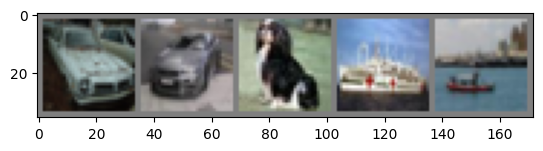

Labels: car car dog ship ship


In [5]:

def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
    

for i, (images, labels) in enumerate(trainloader, 0):
    imshow(torchvision.utils.make_grid(images[:5]))  # Display first 5 images
    
    print('Labels:', ' '.join(f'{classes[labels[j]]}' for j in range(5)))
    
    break

+ Xây dựng model MLP cơ bản để train tập dữ liệu CIFAR10

In [16]:
def getModel(n_features,input_size=3072, hidden_size=128):
    class BasicMLP(nn.Module):
        def __init__(self):
            super(BasicMLP, self).__init__()
            # Define the layers of the MLP
            self.fc1 = nn.Linear(input_size, hidden_size)  # First hidden layer
            self.fc2 = nn.Linear(hidden_size, hidden_size) # Second hidden layer
            self.fc3 = nn.Linear(hidden_size, n_features)  # Output layer

        def forward(self, x):
            # Flatten the input tensor
            x = x.view(x.size(0), -1)  # Reshape the input to (batch_size, input_size)
            # Forward pass through the layers with ReLU activations
            x = nn.functional.relu(self.fc1(x))
            x = nn.functional.relu(self.fc2(x))
            x = self.fc3(x)  # Final layer without activation for raw scores
            return x
    model = BasicMLP()
    return model


+ Khởi tạo hàm loss function và phương thức optimizer

In [17]:
n_features = 10  # For CIFAR-10
model = getModel(n_features)
lr = 0.01
optim = torch.optim.SGD(model.parameters(), lr=lr)

loss_fn = nn.CrossEntropyLoss()
print(model)

BasicMLP(
  (fc1): Linear(in_features=3072, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
)


+ Xây dựng hàm đánh giá model

In [18]:
def evaluate(model, testloader, criterion):
    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0
    for images, labels in testloader:
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)
        test_loss += loss.item()
        
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    test_loss = test_loss / len(testloader)
    return test_loss, accuracy


+ Bắt đầu training và đánh giá model.

In [19]:
n_epochs = 10
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []

for epoch in range(n_epochs):
    running_loss = 0.0
    running_correct = 0
    total = 0
    for i, (inputs, labels) in enumerate(trainloader, 0):
        
        inputs, labels = inputs.to(device), labels.to(device)



        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        running_loss += loss.item()


        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        running_correct += (predicted == labels).sum().item()
     

    epoch_accuracy = 100 * running_correct / total
    epoch_loss = running_loss / (i + 1)
    test_loss, test_accuracy = evaluate(model, testloader, loss_fn)
    print(f"Epoch [{epoch + 1}/{n_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%, Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")
    
    
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)

Epoch [1/10], Loss: 2.3084, Accuracy: 9.55%, Test Loss: 2.3080, Test Accuracy: 9.59%
Epoch [2/10], Loss: 2.3084, Accuracy: 9.55%, Test Loss: 2.3080, Test Accuracy: 9.59%
Epoch [3/10], Loss: 2.3084, Accuracy: 9.55%, Test Loss: 2.3080, Test Accuracy: 9.59%
Epoch [4/10], Loss: 2.3084, Accuracy: 9.55%, Test Loss: 2.3080, Test Accuracy: 9.59%
Epoch [5/10], Loss: 2.3084, Accuracy: 9.55%, Test Loss: 2.3080, Test Accuracy: 9.59%
Epoch [6/10], Loss: 2.3084, Accuracy: 9.55%, Test Loss: 2.3080, Test Accuracy: 9.59%
Epoch [7/10], Loss: 2.3084, Accuracy: 9.55%, Test Loss: 2.3080, Test Accuracy: 9.59%
Epoch [8/10], Loss: 2.3084, Accuracy: 9.55%, Test Loss: 2.3080, Test Accuracy: 9.59%
Epoch [9/10], Loss: 2.3084, Accuracy: 9.55%, Test Loss: 2.3080, Test Accuracy: 9.59%
Epoch [10/10], Loss: 2.3084, Accuracy: 9.55%, Test Loss: 2.3080, Test Accuracy: 9.59%


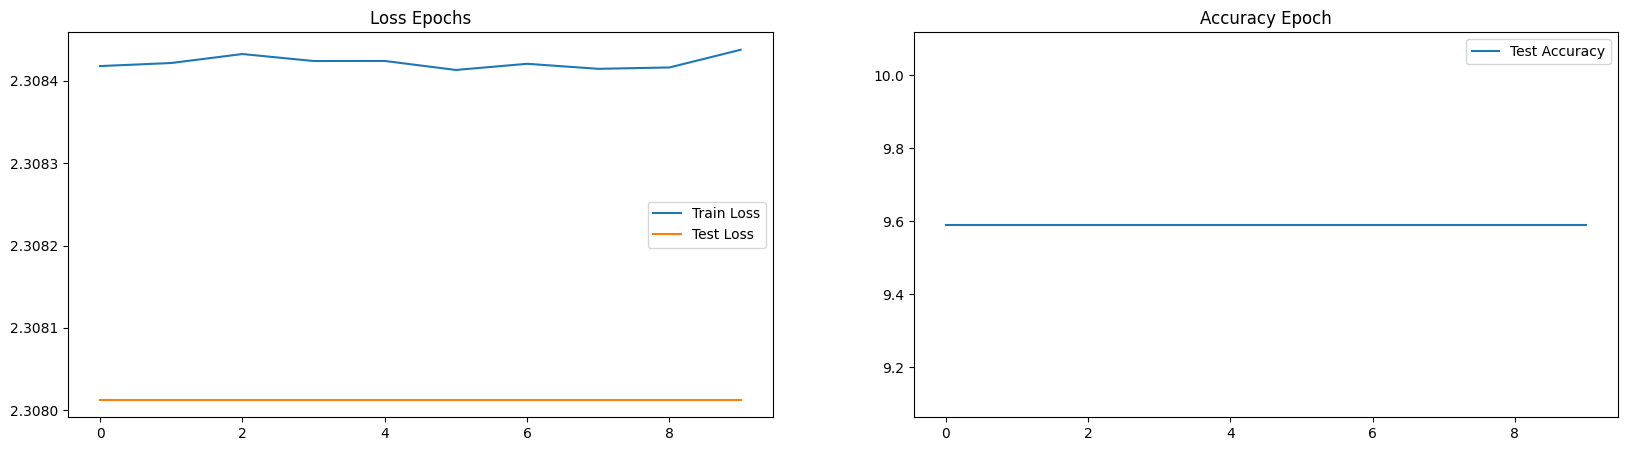

In [20]:
plt.figure(figsize = (20, 5))
plt.subplot(121)
plt.title('Loss Epochs')
plt.plot(train_losses, label = 'Train Loss')
plt.plot(test_losses, label = 'Test Loss')
plt.legend()
plt.subplot(122)
plt.title('Accuracy Epoch')
plt.plot(test_accuracies, label = 'Test Accuracy')
plt.legend()

+ Dưới đây là bài tập về code from scratch

In [21]:
def zScoreScaling(tensor):
    mean = tensor.mean()
    std = tensor.std()
    
    # Apply z-score scaling
    z_score_tensor = (tensor - mean) / std
    return z_score_tensor

In [27]:
def minMaxScaling(tensor):
    min_val = tensor.min()
    max_val = tensor.max()
    
    # Apply min-max scaling
    min_max_tensor = (tensor - min_val) / (max_val - min_val)
    return min_max_tensor

In [32]:
class Linear:
    def __init__(self, input_size, output_size):
        # Initialize weights and biases
        self.weights = torch.randn(input_size, output_size) * 0.01  # Small random values
        self.bias = torch.zeros(output_size)  # Initialize bias to zero

    def forward(self, x):
        """
        Forward pass for linear layer.
        
        Parameters:
        x (torch.Tensor): Input tensor of shape (input_size,)
        
        Returns:
        torch.Tensor: Output tensor of shape (output_size,)
        """
        return x @ self.weights + self.bias  # Matrix multiplication and add bias
    

In [30]:
tensor = torch.tensor([
    [1.0, 2.0, 3.0], 
    [4.0, 5.0, 6.0],
    [7.0, 8.0, 9.0]
])
zscore = zScoreScaling(tensor)
min_max = minMaxScaling(tensor)
print("Z-Score Scaled Tensor:\n", zscore)
print("Min-Max Scaled Tensor:\n", min_max)


Z-Score Scaled Tensor:
 tensor([[-1.4606, -1.0954, -0.7303],
        [-0.3651,  0.0000,  0.3651],
        [ 0.7303,  1.0954,  1.4606]])
Min-Max Scaled Tensor:
 tensor([[0.0000, 0.1250, 0.2500],
        [0.3750, 0.5000, 0.6250],
        [0.7500, 0.8750, 1.0000]])


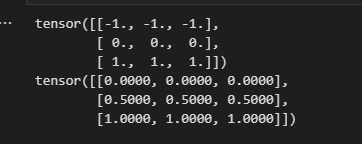

In [36]:
class Linear:
    def __init__(self, input_size, output_size):
        # Initialize weights and biases
        self.weights = torch.randn(input_size, output_size) * 0.01  # Small random values
        self.bias = torch.zeros(output_size)  # Initialize bias to zero

    def forward(self, x):
        """
        Forward pass for linear layer.
        
        Parameters:
        x (torch.Tensor): Input tensor of shape (input_size,)
        
        Returns:
        torch.Tensor: Output tensor of shape (output_size,)
        """
        return x @ self.weights + self.bias  # Matrix multiplication and add bias

tensor = torch.tensor([1.0, 2.0, 3.0])
linear = Linear(3, 2)
out = linear.forward(tensor)
print(out)
print(f"Weight = {linear.weights}")
print(f"Bias = {linear.bias}")

tensor([-0.0655, -0.0195])
Weight = tensor([[ 0.0003,  0.0012],
        [-0.0183, -0.0122],
        [-0.0097,  0.0012]])
Bias = tensor([0., 0.])
